<a href="https://colab.research.google.com/github/zaidsallam10/I_love_u_quantumly/blob/master/Quantum_Computer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install qiskit
# !pip install qiskit_ibmq_provider

#Quantum physics concepts:-

# (Superposition): anything it could be, (zero, one, both).
#Ex: if we have a mug in superposition it could contain anything (Tea, Coffe, Water or all of them).



# (Entanglement): if two Qbits are entangled, change in one causes change in the another one instanluiolsy.
# apps: transforming information faster than the speed of light



# Space/state size of classical computer VS quantum computer:
  # Classifical: n_of_bits * 2 (because it is zero/one)

  # Quantum: 2 ^ n_of_bits (that's fucking huge) (Exponential massive number of states)



# Note:
  # Quantum computer solves the impossible problems that can't be solved by classical computer or take a very long time.



# Apps of Quantum:

# 1. Encryption.
# 2. Trying and getting vaccine for specefic virus.
# 3. getting the factorial of large numbers.



# let's solve this problem: (how to find best/optimal path of specefic maze)?
  # if we apply classical: the computer will apply brute-force-manner by checking all possible paths one-by-one.
  # if we apply quantum: the computer will check all paths (analyze all of them all at once).

/usr/local/lib/python3.6/dist-packages/qiskit/__init__.py:64: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


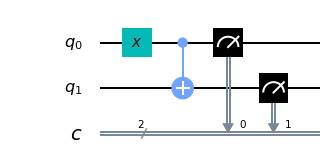

In [3]:
import qiskit as q
# import matplotlib as plot
%matplotlib inline


circuit= q.QuantumCircuit(2,2) # 2 quibits , 2 classical bits

# currently (0,0)
circuit.x(0) # FLipping value of first value
# now (1,0)


circuit.cx(0,1) #CNOT or controlled not, Flips 2nd quibit value IFF and only IFF 1st value is equal= 1

# let's check what's in the coffe mug hahaha
circuit.measure([0,1],[0,1])

circuit.draw(output='mpl')

In [4]:
from qiskit import IBMQ
import pandas as pd
IBMQ.save_account("2f25c1bbc544aeb26689f8d9dc9bca227c0c5099780913fd87dbf704a1716a9bdf1734de5eefb6a9ea552801830b4f4f4911ad216b9a8d412fbdf8903bdeab00")
IBMQ.load_account()


provider=IBMQ.get_provider('ibm-q')
qubits_dataframe=pd.DataFrame(columns=['backend_name', 'qued_qubits', 'number_of_qubits'])
for backend in provider.backends():
  try:
    qubits_count=len(backend.properties().qubits)
  except:
    qubits_count="simulated"
  # qubits_dataframe['backend_name']=backend.name()
  # qubits_dataframe['qued_qubits']=backend.status().pending_jobs
  # qubits_dataframe['number_of_qubits']=qubits_count
  qubits_dataframe = qubits_dataframe.append({'backend_name':backend.name(),'qued_qubits':backend.status().pending_jobs,'number_of_qubits':qubits_count},ignore_index=True)
  print(backend.name(),'has ',backend.status().pending_jobs,"qbits qued",' and has ',qubits_count,'#_of_qubits')
print(qubits_dataframe)

ibmq_qasm_simulator has  0 qbits qued  and has  simulated #_of_qubits
ibmqx2 has  10 qbits qued  and has  5 #_of_qubits
ibmq_16_melbourne has  13 qbits qued  and has  15 #_of_qubits
ibmq_vigo has  6 qbits qued  and has  5 #_of_qubits
ibmq_ourense has  3 qbits qued  and has  5 #_of_qubits
ibmq_london has  6 qbits qued  and has  5 #_of_qubits
ibmq_burlington has  3 qbits qued  and has  5 #_of_qubits
ibmq_essex has  3 qbits qued  and has  5 #_of_qubits
ibmq_armonk has  3 qbits qued  and has  1 #_of_qubits
ibmq_rome has  10 qbits qued  and has  5 #_of_qubits
          backend_name qued_qubits number_of_qubits
0  ibmq_qasm_simulator           0        simulated
1               ibmqx2          10                5
2    ibmq_16_melbourne          13               15
3            ibmq_vigo           6                5
4         ibmq_ourense           3                5
5          ibmq_london           6                5
6      ibmq_burlington           3                5
7           ibmq_essex 

In [12]:
from qiskit.tools.monitor import job_monitor

chosen_backend=provider.get_backend('ibmq_london')
job= q.execute(circuit,chosen_backend,shots=100)
job_monitor(job)

Job Status: job has successfully run


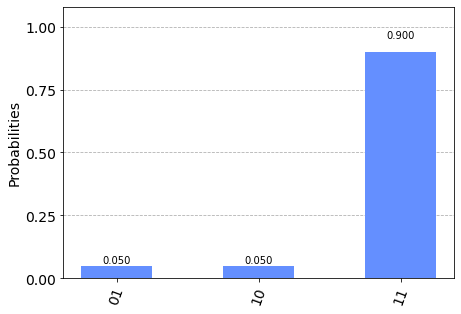

In [13]:
from qiskit.visualization import plot_histogram


result=job.result()
counts=result.get_counts(circuit)
plot_histogram([counts])